# Sleep Detection

### Load dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Imporinting Libraries
import pandas as pd
import plotly.express as px

In [5]:
df = pd.read_parquet('/content/drive/MyDrive/sleep/Zzzs_train.parquet')

In [6]:
df.head()

,series_id,step,timestamp,anglez,enmo,awake
0,08db4255286f,0,2018-11-05T10:00:00-0400,-30.845301,0.0447,1
1,08db4255286f,1,2018-11-05T10:00:05-0400,-34.181801,0.0443,1
2,08db4255286f,2,2018-11-05T10:00:10-0400,-33.877102,0.0483,1
3,08db4255286f,3,2018-11-05T10:00:15-0400,-34.282101,0.0680,1
4,08db4255286f,4,2018-11-05T10:00:20-0400,-34.385799,0.0768,1


Each series is a continuous recording of accelerometer data for a single subject spanning many days.


*  **series_id** - Unique identifier for each accelerometer series.


* **step** - An integer timestep for each observation within a series.
* **timestamp** - A corresponding datetime with ISO 8601 format %Y-%m-%dT%H:%M:%S%z.
* anglez - As calculated and described by the GGIR package, z-angle is a metric derived from individual accelerometer components that is commonly used in sleep detection, and refers to the angle of the arm relative to the vertical axis of the body
* **enmo** - As calculated and described by the GGIR package, ENMO is the Euclidean Norm Minus One of all accelerometer signals, with negative values rounded to zero. While no standard measure of acceleration exists in this space, this is one of the several commonly computed features.

* **awake** - state of the sleep

In [7]:
df.shape

(13165560, 6)

In [13]:
df.columns

Index(['series_id', 'step', 'timestamp', 'anglez', 'enmo', 'awake'], dtype='object')

In [14]:
df.describe()

,step,anglez,enmo,awake
count,1.316556e+07,1.316556e+07,1.316556e+07,1.316556e+07
mean,2.033736e+05,-9.186773e+00,4.404299e-02,6.577188e-01
std,1.272140e+05,3.885585e+01,1.137150e-01,4.744732e-01
min,0.000000e+00,-9.000000e+01,0.000000e+00,0.000000e+00
25%,9.571475e+04,-3.886622e+01,1.100000e-03,0.000000e+00
50%,1.954510e+05,-1.031420e+01,1.600000e-02,1.000000e+00
75%,3.022720e+05,1.658750e+01,4.080000e-02,1.000000e+00
max,6.346790e+05,9.000000e+01,7.016100e+00,1.000000e+00


<Axes: >

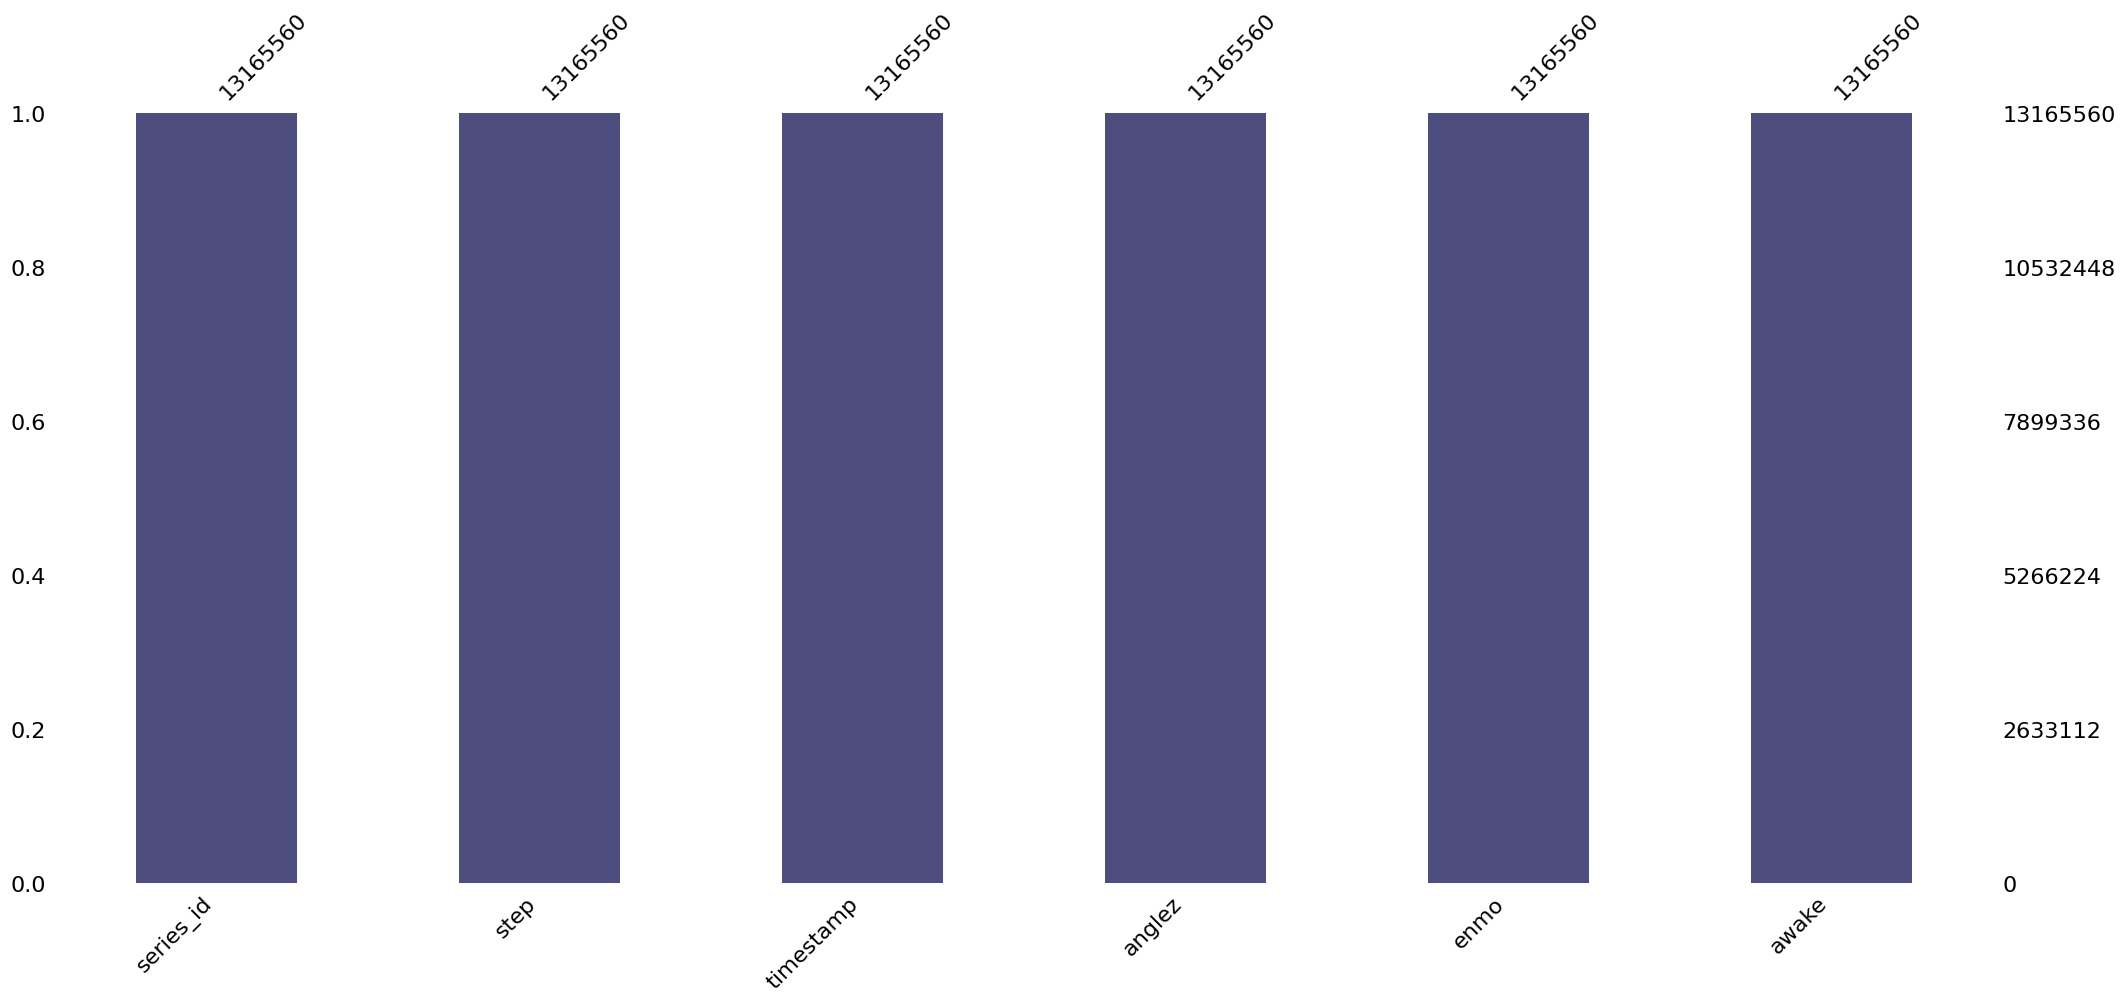

In [10]:
import missingno as msno

msno.bar(df, color=(0.3,0.3,0.5))

In [11]:
df.isnull().sum()

series_id    0
step         0
timestamp    0
anglez       0
enmo         0
awake        0
dtype: int64

In [12]:
df['awake'].value_counts()

1    8659236
0    4506324
Name: awake, dtype: int64